**Gregg Maloy   
Data 602    
Final Project     
Analysis of Maternal Mortality Rates in the United States between 1999-2019 by Maternal Race**

**PART I. INTRODUCTION**

*Research Question*    
The analysis will answer the following questions using OLS linear regression:    
Has maternal mortality increased for all racial/ethnic groups over the past twenty years?     
(Supervised machine learning was attempted at the end of the analysis after the conclusion)

*Justification and Relevance*     
It is well documented that maternal mortality, considered a health indicator for the greater population, has increased within recent years, particularly among minority groups.  Health systems throughout the country are tasked with reducing maternal mortality rates.  

This analysis continues work from previous assignments which focused on 1.) maternal mortality in NYC, and 2.) maternal mortality among G7 countries.  In brief, those past analysis determined 1.) maternal mortality to have increased among all racial/ethnic groups in NYC for the years 2016-2020, and 2.) determined the United States to have the highest and most rapidly increasing maternal mortality ratio (MMR) of any G7 country for the years 2000-2017.  Additionally, all G7 countries experienced a decrease in maternal mortality for years 2000-2017, except Canada.

*Data Sources*    
The dataset consists of estimated rates of maternal deaths per 100,000 live births across all 50 states.  It is imporatant to emphasize that the MMR's in the dataset are estimates, as the collection of standardized and comparable maternal mortality data remains a challenge due, in part, to lack of standarized data collection. Data is available via 'The Institute for Health Metrics and Evalulation' website, which is affilated with the University of Washington.   
Dataset: https://ghdx.healthdata.org/record/ihme-data/united-states-maternal-mortality-by-state-race-ethnicity-1999-2019

**PART II. DATA INSPECTION & WRANGLING**   

*Data Inspection*   
Data is loaded into a dataframe from a CSV file using pandas. 
The dataframe has 5901 rows long with 15 columns/variables.   

Variables include:    
- measure_id - A numerical identifier for the 'Maternal Mortality Ratio' measure.        
- measure_name - Each value in this column is 'Maternal Mortality Ratio'.   
- location_id - A numerical location identifier.	   
- location_name - State, Region or National.   
- race_group - Maternal race/ethnic grouping.   
- sex_id - Gender numerical identifier.   
- sex_name - Gender.   
- age_group_id - Maternal age numerical group.   
- age_group_name - Maternal age group.   
- year_id	metric_id - Year.    
- metric_name - Each value in this column is 'Rate'.  
- val - Estimated MMR.	   
- lower - Lower Confidence Interval.   
- upper - Upper Confidence Interval.

Data Inspection Notes
- Variables are encoded to proper data types and include 5 ints, 4 floats, and 6 objects.   
- Information produced by df.describe() was not entirely accurate, as the dataset would need to be tidied for calculations to be relevant.   
- Maternal mortality data is available for 21 years (1999- 2019).   
- Data is available for 50 states, the District of Columbia, as well as 4 census regions and 1 national region.   
- The only null/nan values in the data frame are in column 'location_id', which has 420 null/nan values.   
- Variables of interest for this analysis will be 'location_name', 'year_id', 'race_group', and 'val' (maternal mortality ratio) rate, which is defined as the number of maternal deaths per 100,000 live births.
- Finally the dataframe is filtered to only where 'location_name'='national', as this analysis is only interested on national statistics and will not drill down to state level data.
- The final dataframe has 105 rows and 5 columns: location_name, state_abbreviation, year_id, race_group and val (maternal mortality ratio).

In [371]:
import pandas as pd
#CSV file
url = 'https://raw.githubusercontent.com/greggmaloy/Data_602/main/Data_602_final_maternal_mortality_ratio_US.csv'
df = pd.read_csv(url)
df.head(3)

,measure_id,measure_name,location_id,location_name,race_group,sex_id,sex_name,age_group_id,age_group_name,year_id,metric_id,metric_name,val,lower,upper
0,25,Maternal mortality ratio,523.0,Alabama,Hispanic and any race,2,Female,169,10 to 54,1999,3,Rate,7.054950,3.074580,16.177776
1,25,Maternal mortality ratio,523.0,Alabama,Hispanic and any race,2,Female,169,10 to 54,2000,3,Rate,6.854802,2.409957,18.109539
2,25,Maternal mortality ratio,523.0,Alabama,Hispanic and any race,2,Female,169,10 to 54,2001,3,Rate,7.071387,2.085136,21.455477


In [372]:
#The dataframe is 5901 rows long with 15 columns.
#Variables are encoded to proper data type and include 5 ints, 4 floats, and 6 objects.
#these values are not relevant, as the dataset is not tidied and aggregate counts therefore inaccurate
#Check whether only numeric values are present in numeric columns
#these are all the years included in the dataset
#these are all the 'locations' in the dataset - 50 states, the district of columbia, 4 census regions, and one national region
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measure_id      5901 non-null   int64  
 1   measure_name    5901 non-null   object 
 2   location_id     5481 non-null   float64
 3   location_name   5901 non-null   object 
 4   race_group      5901 non-null   object 
 5   sex_id          5901 non-null   int64  
 6   sex_name        5901 non-null   object 
 7   age_group_id    5901 non-null   int64  
 8   age_group_name  5901 non-null   object 
 9   year_id         5901 non-null   int64  
 10  metric_id       5901 non-null   int64  
 11  metric_name     5901 non-null   object 
 12  val             5901 non-null   float64
 13  lower           5901 non-null   float64
 14  upper           5901 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 691.6+ KB


In [373]:
#these values are not relevant, as the dataset is not tidied and aggregate counts therefore inaccurate
df.describe()

,measure_id,location_id,sex_id,age_group_id,year_id,metric_id,val,lower,upper
count,5901.0,5481.000000,5901.0,5901.0,5901.000000,5901.0,5901.000000,5901.000000,5901.000000
mean,25.0,537.747126,2.0,169.0,2009.000000,3.0,25.883291,12.189606,107.417064
std,0.0,68.411987,0.0,0.0,6.055814,0.0,24.849678,13.794055,380.238824
min,25.0,102.000000,2.0,169.0,1999.000000,3.0,0.238959,0.000029,2.990539
25%,25.0,534.000000,2.0,169.0,2004.000000,3.0,10.490341,2.861350,25.498193
50%,25.0,547.000000,2.0,169.0,2009.000000,3.0,18.918142,7.940514,43.065600
75%,25.0,560.000000,2.0,169.0,2014.000000,3.0,32.783255,16.061453,81.377376
max,25.0,573.000000,2.0,169.0,2019.000000,3.0,441.249133,99.669577,9706.025762


In [374]:
null_counts = df.isnull().sum()
print(null_counts)

measure_id          0
measure_name        0
location_id       420
location_name       0
race_group          0
sex_id              0
sex_name            0
age_group_id        0
age_group_name      0
year_id             0
metric_id           0
metric_name         0
val                 0
lower               0
upper               0
dtype: int64


In [375]:
#420 nan values in locaiton_id. this column is not needed for this analysis and therefore we are not concern with this finding
nan_counts = df.isna().sum()
print(nan_counts)

measure_id          0
measure_name        0
location_id       420
location_name       0
race_group          0
sex_id              0
sex_name            0
age_group_id        0
age_group_name      0
year_id             0
metric_id           0
metric_name         0
val                 0
lower               0
upper               0
dtype: int64


In [376]:
#Check whether only numeric values are present in numeric columns
is_numeric_deaths = all(str(value).isnumeric() for value in df['val'])
is_numeric_year = all(str(value).isnumeric() for value in df['year_id'])

is_numeric_deaths
is_numeric_year

True

In [377]:
#number of unique years in dataset
unique_values = df['year_id'].unique()
#these are all the years included in the dataset
print(unique_values)

[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019]


In [378]:
#number of unqiue locations
unique_values = df['location_name'].unique()
#these are all the 'locations' in the dataset - 50 states, the district of columbia, 4 census regions, and one national region
print(len(unique_values))

56


In [379]:
#unique location names
unique_values = df['location_name'].unique()
#here are all the location_names
print(unique_values)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Midwest Census Region' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'National' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico'
 'New York' 'North Carolina' 'North Dakota' 'Northeast Census Region'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Census Region' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas'
 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Census Region'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [380]:
#filter to only national data
df_first = df[(df['location_name'] == 'National') & (df['race_group'] != 'All racial and ethnic groups')][['location_name',  'year_id', 'race_group', 'val']]
df_first.info()
df_first

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 2940 to 3044
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_name  105 non-null    object 
 1   year_id        105 non-null    int64  
 2   race_group     105 non-null    object 
 3   val            105 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.1+ KB


,location_name,year_id,race_group,val
2940,National,1999,Hispanic and any race,9.632275
2941,National,1999,Non-Hispanic American Indian and Alaska Native,18.967999
2942,National,1999,"Non-Hispanic Asian, Native Hawaiian, or Other ...",9.588760
2943,National,1999,Non-Hispanic Black,31.430603
2944,National,1999,Non-Hispanic White,9.206410
...,...,...,...,...
3040,National,2019,Hispanic and any race,20.794233
3041,National,2019,Non-Hispanic American Indian and Alaska Native,69.277333
3042,National,2019,"Non-Hispanic Asian, Native Hawaiian, or Other ...",20.813692
3043,National,2019,Non-Hispanic Black,67.630211


**PART III. ANALYSIS**    
*Ordinary Least Squares Regression*   
Scipy was used to fit an OLS model, as I was interested in summary statistics for the OLS model, particularly p-value. Plotly was then used to visualize the OLS analysis.
The result of the OLS are as follows:       

1.  R-Squared:      
All R-squared values are relatively high, meaning there is a strong direct correlation between the two variables.  In other words, as years increase chronologically, the MMR rate for all race/ethnicity groups increased.  *A word of caution: As the model is relatively simple with few data points, this model cannot be used to predict future MMR, but is useful to display the overall direct correlation which exists between the two variables.*       
    
    
2. P-Values:     
The p-values are <0.01 denoting statistcal significance. However since the model is simple, this is most likely inaccurate.  P-value would be necessary for a more complex model.       
     
     

3. Slope:     
The race category with the largest slope is Non-Hispanic American Indian and Alaska Native (2.487088), followed by
Non-Hispanic Black (0.960705) and Non-Hispanic White (0.976694). This means that for every increase in the 'year' variable, the MMR is expected to increase by 2.48 units among the nationwide 'Non-Hispanic American Indian and Alaska Natives'.

4. Residual Analysis:    
Residual analysis conculded that the model was a poor fit, as the residuals were not distributed randomly.

*Slope, Correlation Coefficent & P-value*

In [381]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

#dictionary 
regression_results = {}

#loop race groups
for race_group, group_data in df_first.groupby('race_group'):
    #OLS
    result = linregress(group_data['year_id'], group_data['val'])
    #correlation coefficient, slope, and p-value
    correlation_coefficient = result.rvalue
    slope = result.slope
    p_value = result.pvalue
    
    #r-squared
    r_squared = correlation_coefficient**2
    
    #stored statistics
    regression_results[race_group] = {
        'correlation_coefficient': correlation_coefficient,
        'slope': slope,
        'p_value': p_value,
        'r_squared': r_squared
    }

#place into df
df_results = pd.DataFrame(regression_results).T

#order by slope
df_results=df_results.sort_values(by='slope', ascending=False)
df_results

,correlation_coefficient,slope,p_value,r_squared
Non-Hispanic American Indian and Alaska Native,0.958614,2.487088,8.072180e-12,0.918941
Non-Hispanic Black,0.960705,2.155194,4.973128e-12,0.922955
Non-Hispanic White,0.976694,1.218989,3.701650e-14,0.953932
Hispanic and any race,0.983602,0.669747,1.347896e-15,0.967473
"Non-Hispanic Asian, Native Hawaiian, or Other Pacific Islander",0.911895,0.506998,8.794256e-09,0.831553


*Plot*

In [382]:
import plotly.express as px
import pandas as pd

fig = px.scatter(
    df_first,
    x='year_id',
    y='val',
    color='race_group',
    trendline='ols',  
    opacity=0.3,
    labels={'val': 'Value'},
    title='MMR Over Time by Race Group',
    
)

fig.show()

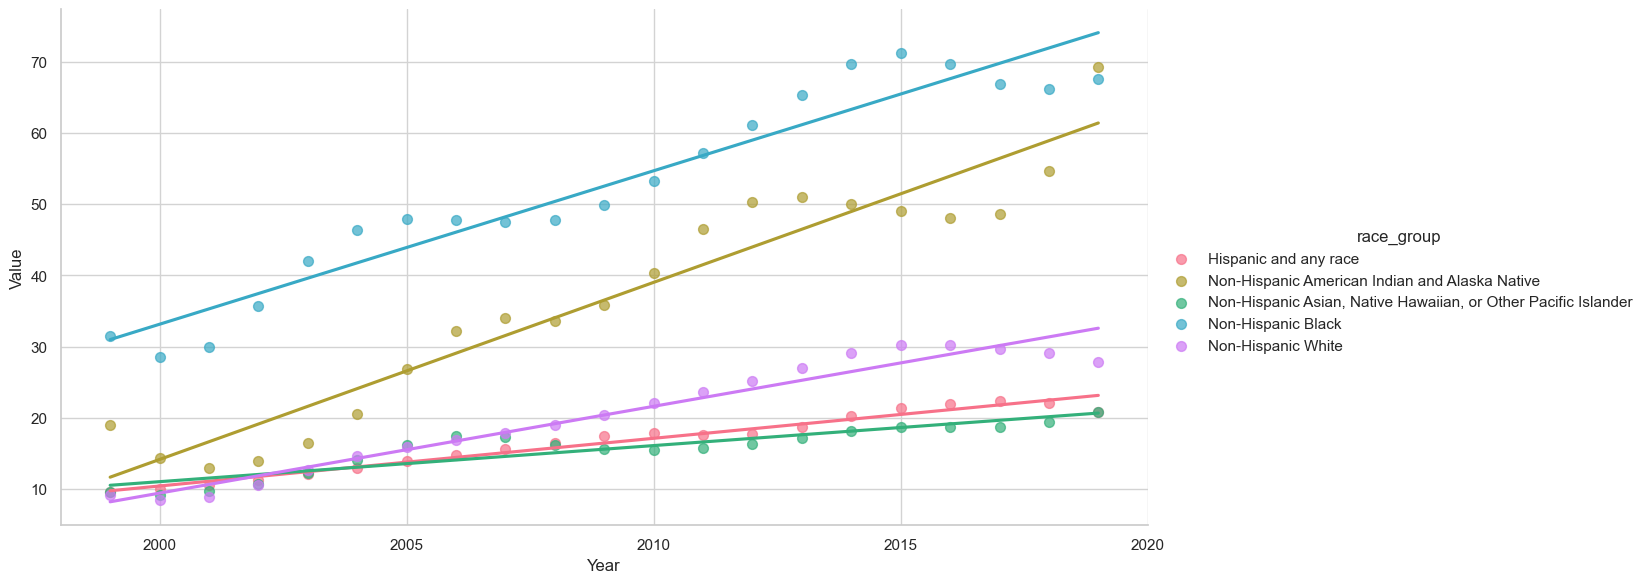

In [387]:
#this was made for github since github does not display plotly
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator

sns.set(style="whitegrid", rc={"grid.color": "lightgray"})
custom_palette = sns.color_palette("husl", n_colors=len(df_first['race_group'].unique()))
sns.lmplot(
    data=df_first, 
    x='year_id', 
    y='val', 
    hue='race_group', 
    palette=custom_palette, 
    aspect=2, 
    height=6, 
    ci=None, 
    scatter_kws={'alpha':0.7, 's': 50}
)
plt.xlabel('Year')
plt.ylabel('Value')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
line_colors = sns.color_palette("husl", n_colors=len(df_first['race_group'].unique()))
plt.show()

*Residual Analysis*    

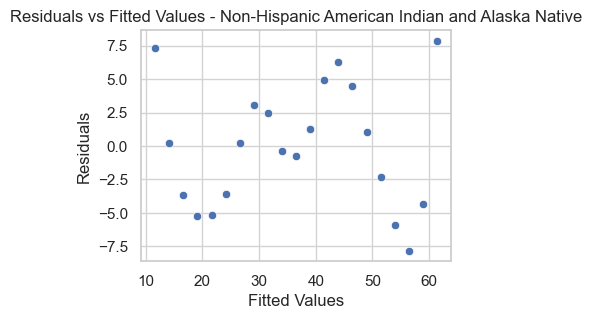

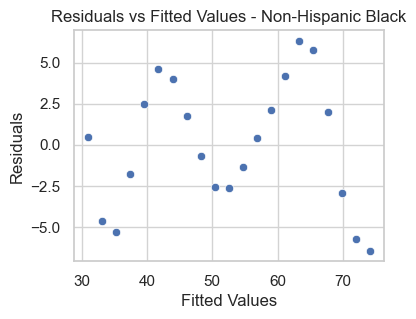

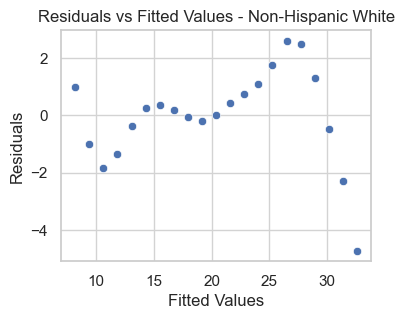

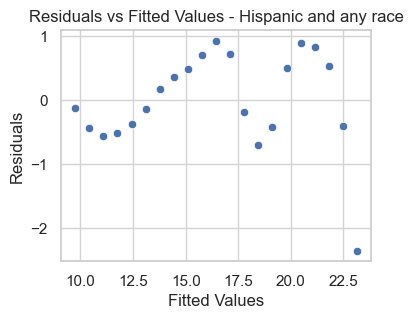

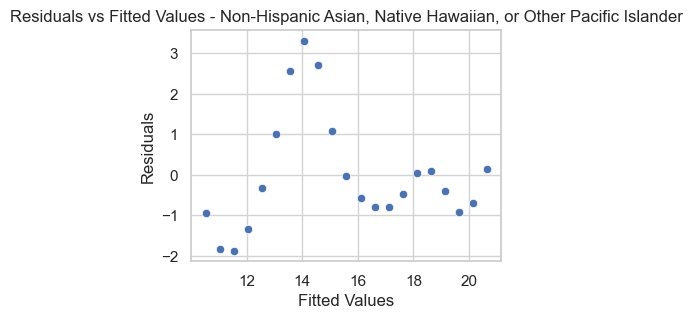

In [384]:
# Plot residual analysis for each race group
for race_group in df_results.index:
    # Fit OLS model
    X = sm.add_constant(df_first[df_first['race_group'] == race_group]['year_id'])
    y = df_first[df_first['race_group'] == race_group]['val']
    model = sm.OLS(y, X).fit()
    
    # Calculate residuals
    residuals = model.resid
    
    # Plot residuals vs. fitted values
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=model.fittedvalues, y=residuals)
    plt.title(f"Residuals vs Fitted Values - {race_group}")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.show()

**PART IV. CONCLUSION**    
MMR was determine to increase among all race/ethnic groups between 1999-2019 as denoted by OLS analysis. 'Non-Hispanic American Indian and Alaska Native' women were determined to have the highest MMR, followed by 'Non-Hispanic Black','Non-Hispanic White','Hispanic and any race' and finally 'Non-Hispanic Asian, Native Hawaiian, or Other Pacific Islander'.  Residual analysis concluded that the model was a poor fit. Using OLS to answer the research question was most likely excessive, but I would say the analysis did answer the research question that maternal mortality increased for all racial/ethnic groups over the past twenty years, even if the model was flawed.

**PART V. SUPERVISED MACHINE LEARNING ATTEMPT**    
The dataset was filtered to 'Non-Hispanic American Indian and Alaska Natives' on a nationwide level resulting in a dataframe of 21 rows and the two columns of interest.  Using machine learning on a dataset of this size is excessive, but was attempted to demostrate how machine learning might be used with a similar dataset.

The final R-squared of 0.9128968159058444 indicates that model explains about 91% of the variance in the target variable, which is quite high and the model's predictions have an error of 4.92 deaths (which is 5 deaths per 100,000 live births).  

Again, machine learning in this instance is not appropriate but was undertaken for demonstration purposes.  In order to validate the model, further analysis, such as residual analysis, would need to be undertaken.

In [332]:
df_ami = df_first[df_first['race_group'] == 'Non-Hispanic American Indian and Alaska Native'][['year_id', 'val']]
df_ami

,year_id,val
2941,1999,18.967999
2946,2000,14.381800
2951,2001,12.972851
2956,2002,13.876354
2961,2003,16.432849
2966,2004,20.498080
2971,2005,26.819092
2976,2006,32.123062
2981,2007,33.998407
2986,2008,33.642578


In [333]:
X=df_ami.drop("val",axis=1).values
y=df_ami["val"].values
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [334]:
#insuring correct shape
X_year=X[:,0]
print(y.shape,X_year.shape)


(21,) (21,)


In [335]:
X_year=X_year.reshape(-1,1)
print(X_year.shape)

(21, 1)


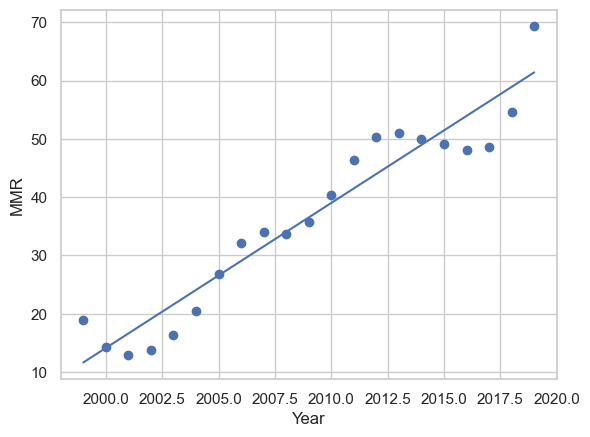

In [336]:
# a plot of MMR for Non-Hispanic American Indian and Alaska Native over the years with an OLS regression line

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_year,y)
predictions=reg.predict(X_year)
plt.scatter(X_year,y)
plt.plot(X_year, predictions)
plt.ylabel("MMR")
plt.xlabel("Year")
plt.show()

In [337]:
#test and train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
reg_all=LinearRegression()
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)
print("Predictions: {},Actual Value:{}".format(y_pred[:2],y_test[:2]))

Predictions: [ 9.15376059 55.0209957 ],Actual Value:[18.96799925 48.01719533]


In [338]:
from sklearn.metrics import mean_squared_error
r_squared=reg.score(X_test,y_test)
rmse=mean_squared_error(y_test,y_pred,squared=False)
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9128968159058444
RMSE: 4.918533405560223


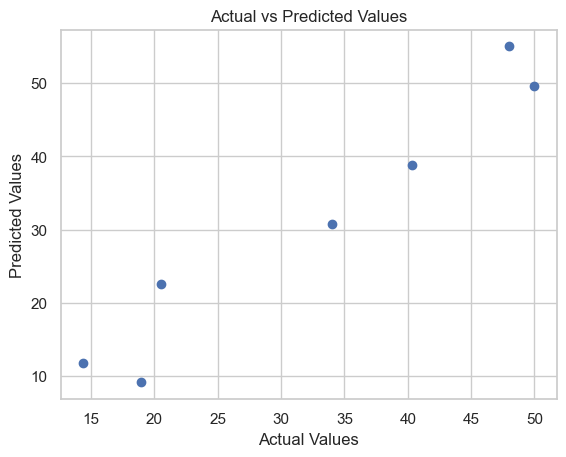

In [339]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()